<a href="https://colab.research.google.com/github/celsocrivelaro/senac-ciencia-dados/blob/main/Testes_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import scikit_posthocs as sp
import numpy as np
from scipy import stats
import pandas as pd
!pip install scikit_posthocs
import scikit_posthocs as sp

pd.options.display.float_format = '{:,.4f}'.format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Testes de Hipóteses

H0: hipótese nula

H1: hipótese alternativa

Possíveis configurações:

1.   H0: média == x, H1 média != x
2.   H0: média <= x, H1 média > x
3. H0: média >= x, H1 média < x




**Para checar para usar um teste paramétrica ou não-paramétricos, checar os seguintes requisitos:**

- Observações são independentes e identicamente distribuídas
- Distribuídas normalemtne
- Variância Igual

**Como checar se é Pareado ou não-pareado?**

Se forem pareados, os dados das 2 comparações são feitos pela mesmo pessoa ou experimento.

Como escolher o teste de Hipótese?

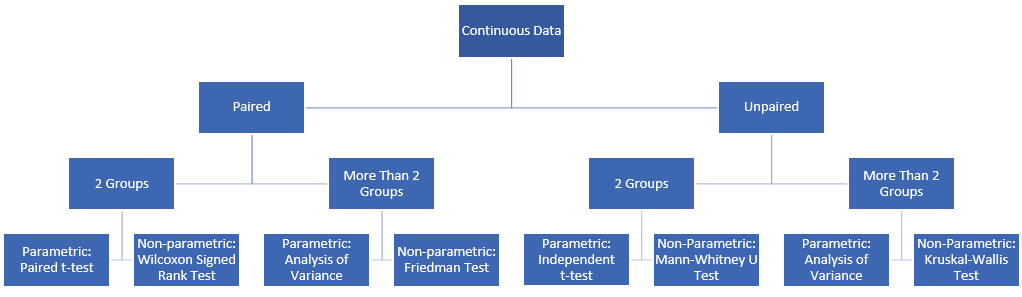

Lista dos testes:

- [Paired t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)
- [Wilcoxon Signed Rank Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon)
-  [Analysis of Variance (ANOVA)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway)
- [Friedman Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html#scipy.stats.friedmanchisquare)
- [Independent t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
- [Mann-Whitey U test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)
- [Kruskal-Walls test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

Checar se a distribuição é Paramétrica (Normal):

In [ ]:
def checar_se_eh_parametrica(dados):
  test_stat, p_value = stats.normaltest(dados)
  print("p value:%.4f" % p_value)
  if p_value >= 0.05:
      print("É paramétrico")
  else:
    print("Não é paramétrico")

# Problema 1 - Notas

O professor do SENAC de Ciência de Dados gostaria de checar se as notas da disciplina teve diferenças quando as aulas foram remotas ou presenciais. Assumindo que são turmas diferentes, será que os alunos do remoto tiveram notas piores?

### Definição da hipótese:

- H0: nota_presencial <= nota_remoto
- H1: nota_presencial > nota_remoto

## Premissas

H₀: The data is normally distributed.

H₁: The data is not normally distributed.

α = 0.05 , se p-valor > 0.05 , os dados são distribuídos normalmente.

In [ ]:
presencial = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
       87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
remoto = np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2])

checar_se_eh_parametrica(presencial)
checar_se_eh_parametrica(remoto)

p value:0.7719
É paramétrico
p value:0.0345
Não é paramátrico


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [ ]:
## Escolhendo o teste apropriado:

ttest,p_value = stats.mannwhitneyu(presencial, remoto)
print("p-valor:%.8f" % p_value)
if p_value >= 0.05:
  print("Falhou em rejeitar a hipótese nula - Aceitar H0")
else:
  print("Rejeitou a hipótese nula")

p-valor:0.00552305
Rejeitou a hipótese nula


# Problema 2 - Metodologias de pesquisa

Um pesquisador do SENAC fez uma metodologia C e quer comparar a performance com metodologias já consolidados na área A e B com 8 experimentos conhecidos.

### Definição da hipótese:

- H0: média_a == média_b == média_c
- H1: Alguma é diferente

In [ ]:
metodologia_a = np.array([89.9, 89.9, 88.6, 88.7, 89.6, 89.7, 89.2, 89.3])
metodologia_b = np.array([90.0, 90.1, 88.8, 88.9, 89.9, 90.0, 89.0, 89.2])
metodologia_c = np.array([91.5, 90.7, 90.3, 90.4, 90.2, 90.3, 90.2, 90.3])

In [ ]:
checar_se_eh_parametrica(metodologia_a)
checar_se_eh_parametrica(metodologia_b)
checar_se_eh_parametrica(metodologia_c)

p value:0.5454
É paramétrico
p value:0.0633
É paramétrico
p value:0.0009
Não é paramátrico


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [ ]:
test_stat,p_value = stats.friedmanchisquare(metodologia_a,metodologia_b, metodologia_c)
print("p value:%.4f" % p_value)
if p_value <0.05:
    print("Rejeitar a hipótese nula")
else:
    print("Falhou em rejeitar a hipótese nula")

p value:0.0015
Rejeitar a hipótese nula


Podemos concluir que um dos 3 experimentos não perfoma igual.

Mas qual performa melhor? Como o teste é não-paramétrico, iremos usar o post-hoc do Wilcoxon que compara 2 a 2.

In [ ]:
data = np.array([metodologia_a, metodologia_b, metodologia_c])
posthoc_df=sp.posthoc_wilcoxon(data, p_adjust="holm")

group_names= ["Metodologia A", "Metodologia B","Metodologia C"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet;color:black" if x<0.05 else "background-color: white;color:black")

,Metodologia A,Metodologia B,Metodologia C
Metodologia A,1.000000,0.109375,0.023438
Metodologia B,0.109375,1.000000,0.023438
Metodologia C,0.023438,0.023438,1.000000


Podemos concluir que a metodologia C funciona melhor que A e B.

# Teste Qui-Quadrado

In [ ]:
from scipy.stats import chi2_contingency

obs = np.array([[100, 400],[500, 1500]])
chi2, p, graus_liberdade, ex = chi2_contingency(obs, correction=False)

print("expected frequencies:\n ", np.round(ex,2))
print("graus de liberdade:", graus_liberdade)
print("test stat :%.4f" % chi2)
print("p-valor:%.4f" % p)

expected frequencies:
  [[ 120.  380.]
 [ 480. 1520.]]
graus de liberdade: 1
test stat :5.4825
p-valor:0.0192
